# Shein footwear engagement insights


- I used in this work a Kaggle dataset available here: https://www.kaggle.com/datasets/atharvataras/shein-footwear-dataset?resource=download
- This dataframe was chosen to deal with a potential real life situation in a workday on a e-commerce company. 
- This analysis can bring valuable insights on the customer's engagement on this e-commerce in this sub-segment of footwear. 

In [4]:
#Import libraries to be used in this analysis.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.stats import spearmanr

# ANALYSIS

In [5]:
#Store our dataset in a variable called df(data frame)
df = pd.read_csv("shein_footwear_clean.csv")

In [6]:
#To check if everything is ok with the dataframe and visualize it
df.head(10)

,name,link,price_usd,mark_price_usd,star_rating,colour,seller_name,review_count,sku_id,hero_image
0,"Women's Casual Sports Shoes, Fashionable Versa...",https://us.shein.com/Women-s-Casual-Sports-Sho...,19.40,24.40,4.83,Khaki,Womens Shoes,77,sx2305270713671620,//img.ltwebstatic.com/images3_spmp/2023/12/19/...
1,2024 New Spring/Autumn Women Breathable Mesh H...,https://us.shein.com/2024-New-Spring-Autumn-Wo...,14.90,18.80,0.00,NaN,Limeiya Factory,0,sx2404088145930048,//img.ltwebstatic.com/images3_pi/2024/04/17/55...
2,Women's Casual Slip-on Flat Skate Shoes With A...,https://us.shein.com/Women-s-Casual-Slip-on-Fl...,7.50,18.80,4.92,NaN,Dawanfu,66,sx2309025401152825,//img.ltwebstatic.com/images3_pi/2023/09/04/a0...
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",https://us.shein.com/Women-Mesh-Breathable-Cas...,12.06,21.30,0.00,Purple,NaN,41,sx2308191847675463,//img.ltwebstatic.com/images3_spmp/2023/08/19/...
4,Women's Fashionable Casual Sneakers,https://us.shein.com/Women-s-Fashionable-Casua...,13.53,17.05,0.00,Grey,NaN,100+,sx2307234044444164,//img.ltwebstatic.com/images3_spmp/2023/12/31/...
5,"Sporty Chunky Sneakers For Women, Letter Graph...",https://us.shein.com/Sporty-Chunky-Sneakers-Fo...,21.30,26.90,0.00,White,NaN,500+,sx2211274466519128,//img.ltwebstatic.com/images3_pi/2023/04/07/16...
6,Summer Women Casual Sports Shoes Slip-On Hollo...,https://us.shein.com/Summer-Women-Casual-Sport...,14.90,14.90,0.00,Beige,NaN,0,st2404138888746786,//img.ltwebstatic.com/images3_spmp/2024/04/13/...
7,Comfortable Thick-Soled One Foot Slip-On Rocki...,https://us.shein.com/Comfortable-Thick-Soled-O...,16.90,21.20,0.00,Khaki,NaN,500+,sx2310298141659915,//img.ltwebstatic.com/images3_pi/2024/04/16/1a...
8,New Spring Fashionable Casual Sports Style Thi...,https://us.shein.com/New-Spring-Fashionable-Ca...,22.90,28.80,0.00,Beige,NaN,15,sx2401318579349193,//img.ltwebstatic.com/images3_spmp/2024/01/31/...
9,"Women Lace Up Casual Shoes, Sporty Outdoor Can...",https://us.shein.com/Women-Lace-Up-Casual-Shoe...,13.00,16.30,0.00,NaN,NaN,36,sx2302128416011119,//img.ltwebstatic.com/images3_pi/2023/02/13/16...


In [7]:
#Vizualize the count of rows and numbers
df.shape

(899, 10)

In [8]:
#Here I backup the dataframe for safety
df_backup = df.copy()

In [9]:
#Store in a variable the number of NULL values per column.
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

name                0
link                0
price_usd           0
mark_price_usd      0
star_rating         0
colour            209
seller_name       890
review_count        0
sku_id              0
hero_image          0
dtype: int64


In [10]:
#Now I store in a variable the number of NULLS for each row
nulos_por_linhas = df.isnull().sum(axis=1) # 'axis=1' here specifies that the sum is made horizontally
print(nulos_por_linhas)

0      0
1      1
2      1
3      1
4      1
      ..
894    1
895    1
896    1
897    1
898    2
Length: 899, dtype: int64


In [11]:
#With this function I check the general information of the data frame.
df.describe()

,price_usd,mark_price_usd,star_rating
count,899.000000,899.000000,899.000000
mean,17.303537,23.231624,0.043437
std,15.234275,18.266408,0.458675
min,0.610000,2.100000,0.000000
25%,11.900000,16.200000,0.000000
50%,15.800000,21.000000,0.000000
75%,19.990000,26.000000,0.000000
max,247.500000,319.070000,4.920000


In [12]:
#Now the info function is used to theck the type of the entries in this dataset
info_df = df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            899 non-null    object 
 1   link            899 non-null    object 
 2   price_usd       899 non-null    float64
 3   mark_price_usd  899 non-null    float64
 4   star_rating     899 non-null    float64
 5   colour          690 non-null    object 
 6   seller_name     9 non-null      object 
 7   review_count    899 non-null    object 
 8   sku_id          899 non-null    object 
 9   hero_image      899 non-null    object 
dtypes: float64(3), object(7)
memory usage: 70.4+ KB
None


# PROCESSING DATA

- Use the Matplotlib or Seaborn library to build new graphs.
- Create graph visualizations with pandas.
- Make SQL queries.
- Use the Matplotlib or Seaborn library to build new graphs.
- Perform a hypothesis test.

All to verify the relationship between customer engagement and price.

In [13]:
#this function is used to eliminate duplicates 
df = df.drop_duplicates()

In [14]:
#this function output the name of all the colunns in the dataset on a list,
#making it easy to manipulate them
df.columns

Index(['name', 'link', 'price_usd', 'mark_price_usd', 'star_rating', 'colour',
       'seller_name', 'review_count', 'sku_id', 'hero_image'],
      dtype='object')

In [15]:
#I dropped the 'seller_name' column because it has many Null Values (890/899)
#and it would be not valuable to our analysis.
df = df.drop(columns=['seller_name'])

In [16]:
#To verify if the column above was, in fact , removed
df.shape

(899, 9)

In [17]:
#I renamed the columns names to the language use in the BootCamp I was doing.
df.rename(columns={
    'name': 'nome do anuncio',
    'link': 'link do produto',
    'price_usd':  'preço em usd',
    'mark_price_usd': 'preço marcado',
    'star_rating': 'classificação',
    'colour': 'cor',
    'review_count': 'numero de comentários',
    'sku_id': 'Ididentificador de sku',
    'hero_image': 'link da imagem'
}, inplace=True)

In [18]:
#Verify the translation
df.columns

Index(['nome do anuncio', 'link do produto', 'preço em usd', 'preço marcado',
       'classificação', 'cor', 'numero de comentários',
       'Ididentificador de sku', 'link da imagem'],
      dtype='object')

In [19]:
#Save the dataset in a CSV file. 'index=False'is to save the document without 
#the index column to make it more clear
df.to_csv('shein_tratado.csv', index=False)

In [20]:
#to verify the processes document
df.head(10)

,nome do anuncio,link do produto,preço em usd,preço marcado,classificação,cor,numero de comentários,Ididentificador de sku,link da imagem
0,"Women's Casual Sports Shoes, Fashionable Versa...",https://us.shein.com/Women-s-Casual-Sports-Sho...,19.40,24.40,4.83,Khaki,77,sx2305270713671620,//img.ltwebstatic.com/images3_spmp/2023/12/19/...
1,2024 New Spring/Autumn Women Breathable Mesh H...,https://us.shein.com/2024-New-Spring-Autumn-Wo...,14.90,18.80,0.00,NaN,0,sx2404088145930048,//img.ltwebstatic.com/images3_pi/2024/04/17/55...
2,Women's Casual Slip-on Flat Skate Shoes With A...,https://us.shein.com/Women-s-Casual-Slip-on-Fl...,7.50,18.80,4.92,NaN,66,sx2309025401152825,//img.ltwebstatic.com/images3_pi/2023/09/04/a0...
3,"Women Mesh Breathable Casual Shoes, Soft Non-S...",https://us.shein.com/Women-Mesh-Breathable-Cas...,12.06,21.30,0.00,Purple,41,sx2308191847675463,//img.ltwebstatic.com/images3_spmp/2023/08/19/...
4,Women's Fashionable Casual Sneakers,https://us.shein.com/Women-s-Fashionable-Casua...,13.53,17.05,0.00,Grey,100+,sx2307234044444164,//img.ltwebstatic.com/images3_spmp/2023/12/31/...
5,"Sporty Chunky Sneakers For Women, Letter Graph...",https://us.shein.com/Sporty-Chunky-Sneakers-Fo...,21.30,26.90,0.00,White,500+,sx2211274466519128,//img.ltwebstatic.com/images3_pi/2023/04/07/16...
6,Summer Women Casual Sports Shoes Slip-On Hollo...,https://us.shein.com/Summer-Women-Casual-Sport...,14.90,14.90,0.00,Beige,0,st2404138888746786,//img.ltwebstatic.com/images3_spmp/2024/04/13/...
7,Comfortable Thick-Soled One Foot Slip-On Rocki...,https://us.shein.com/Comfortable-Thick-Soled-O...,16.90,21.20,0.00,Khaki,500+,sx2310298141659915,//img.ltwebstatic.com/images3_pi/2024/04/16/1a...
8,New Spring Fashionable Casual Sports Style Thi...,https://us.shein.com/New-Spring-Fashionable-Ca...,22.90,28.80,0.00,Beige,15,sx2401318579349193,//img.ltwebstatic.com/images3_spmp/2024/01/31/...
9,"Women Lace Up Casual Shoes, Sporty Outdoor Can...",https://us.shein.com/Women-Lace-Up-Casual-Shoe...,13.00,16.30,0.00,NaN,36,sx2302128416011119,//img.ltwebstatic.com/images3_pi/2023/02/13/16...


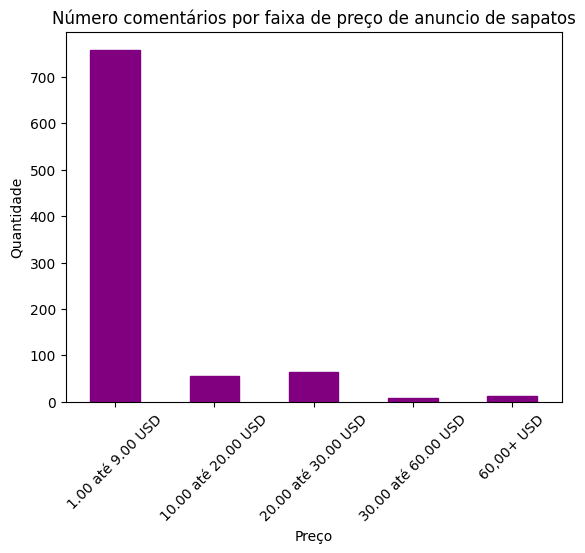

In [21]:
#Build a function to categorize prices, that iterates through each value 
#of each column, applying conditionals that will return info to categorize those
#prices in a range. The rage function was used instead of operators to 
#make the code more clean and concise. 

def categorizar_preco(valor):
    if valor > 59:
        return "60,00+ USD"
    if valor in range(29,58):
        return "30.00 até 60.00 USD"
    if valor in range(19,28):
        return "20.00 até 30.00 USD"
    if valor in range(9,18):
        return "10.00 até 20.00 USD"
    else:
        return "1.00 até 9.00 USD"


#Apply the function created to the preco variable
preco = df["preço marcado"].apply(categorizar_preco)
#count the values, organizing them in this variable below
preco_contagem = preco.value_counts().sort_index()

#create chart from the variable storing the price count
preco_contagem.plot(kind='bar', edgecolor='purple', color='purple')

#configure the chart
plt.xticks(rotation=45) #change the angle of the ticks to 45º for better 
#vizualization
plt.xlabel("Preço")
plt.ylabel("Quantidade")
plt.title("Número comentários por faixa de preço de anuncio de sapatos")
plt.show()

From the chart above, we can see the correlation between the engagement and price. The price range of $1.00 to $9.00 USD footwear have overwhelmingly more comments than the other price ranges.

Correlação de Spearman: -0.1532955254945988
Valor p: 0.002432060084467862


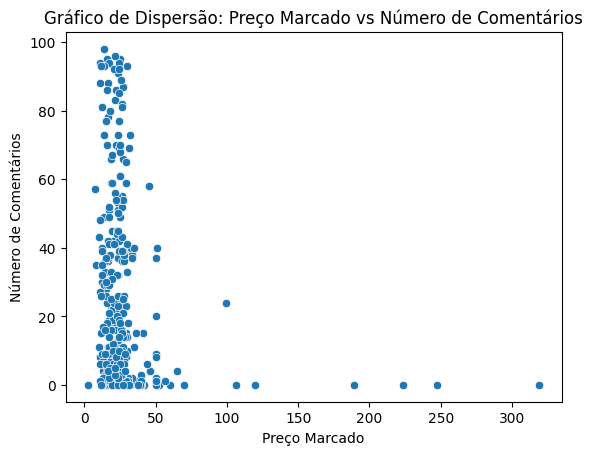

In [22]:

#For this two colour analyzed have the same lenght, otherwise spearmanr function will not work
df_cleaned = df[["preço marcado", "numero de comentários"]].dropna()

#Convert "numero de comentários" to numeric for safety
df_cleaned["numero de comentários"] = pd.to_numeric(df_cleaned["numero de comentários"], errors='coerce')

#Drop rows with missing values again (if conversion introduced new Null Values)
df_cleaned = df_cleaned.dropna()

#store in a variable the columns I want to work with
preco = df_cleaned["preço marcado"]
comentarios = df_cleaned["numero de comentários"]

#spearman test
correlation, valor_p = spearmanr(preco, comentarios)
print("Correlação de Spearman:", correlation)
print("Valor p:", valor_p)

#Chart
sns.scatterplot(x="preço marcado", y="numero de comentários", data=df_cleaned)
plt.title("Gráfico de Dispersão: Preço Marcado vs Número de Comentários")
plt.xlabel("Preço Marcado")
plt.ylabel("Número de Comentários")
plt.show()

From the scatter plot and the chart above, we observe a clear trend: customer engagement (measured by the number of comments) is significantly higher for low to average-priced shoes compared to higher-priced ones. This suggests that consumers in this e-commerce sub-segment of footwear are more likely to interact with and discuss affordable products.

The higher engagement for low to average-priced shoes may indicate a consumer solidarity mentality. Shoppers on platforms like Shein, where affordability is a key driver, might be more inclined to share their experiences when they find products that exceed their expectations in terms of durability, design, or value for money.

The data suggests that price sensitivity plays a significant role in customer engagement. Consumers are more likely to engage with products that align with their budget expectations, which in this case, are lower-priced items.

Highlighting affordability and value in product descriptions and marketing campaigns could further boost engagement and sales.

Encouraging customers to leave reviews or comments, especially for low to average-priced items, could enhance the sense of community and trust among shoppers.

This analysis provides valuable insights into customer engagement within the low to average-priced footwear segment. By understanding the factors driving this behavior, sellers can tailor their strategies to better meet customer expectations and foster a more interactive and loyal customer base.